In [59]:
import numpy as np
import pandas as pd

from scipy.stats import norm, ttest_ind
from scipy.optimize import minimize_scalar

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import f_regression, mutual_info_regression, RFECV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
data2 = pd.read_csv('04_default_of_credit_card_clients.csv',sep=';')
data2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,class
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [98]:
data2['class'].value_counts()

0    23364
1     6636
Name: class, dtype: int64

In [61]:
class_names = [0,1]

In [62]:
#The cut function was used to convert age to groups of age ranges. (Here're 3 groups) 

In [63]:
data2['X5'].min()

21

In [64]:
data2['X5'].max()

79

In [65]:
#There will be 3 age intervals : [21, 40.3] [40.3, 59.6] [59.6, 79] with labelse

In [66]:
 # X5 - age
pd.cut(data2['X5'], 3, labels=["very young", "young", "over the hill"], retbins=True)

(0        very young
 1        very young
 2        very young
 3        very young
 4             young
 5        very young
 6        very young
 7        very young
 8        very young
 9        very young
 10       very young
 11            young
 12            young
 13       very young
 14       very young
 15       very young
 16       very young
 17            young
 18            young
 19       very young
 20       very young
 21       very young
 22       very young
 23       very young
 24       very young
 25       very young
 26       very young
 27       very young
 28            young
 29       very young
             ...    
 29970    very young
 29971    very young
 29972    very young
 29973    very young
 29974    very young
 29975         young
 29976         young
 29977    very young
 29978    very young
 29979    very young
 29980         young
 29981         young
 29982    very young
 29983         young
 29984    very young
 29985    very young
 29986    ver

In [67]:
y = list(data2['class'])
X = data2.drop(['class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [68]:
# DummyClassifier is a classifier that makes predictions using simple rules.

In [69]:
from sklearn.dummy import DummyClassifier
from imblearn.metrics import classification_report_imbalanced

In [70]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(classification_report_imbalanced(y_test, pred_dummy))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      0.77      0.22      0.78      0.41      0.18      9357
          1       0.22      0.22      0.77      0.22      0.41      0.16      2643

avg / total       0.66      0.65      0.34      0.65      0.41      0.17     12000



In [71]:
# class '0' is majority class. Precision and recall for both classes are very low. 
#Also, for unbalanced data is very useful f1 (F-measure) and here it's only 0.65.

In [72]:
#use a test on the raw (unbalanced) data and comment the results (compare with a test on the balanced data)

In [73]:
# To balance the data was used RandomUnderSampler
# Is's a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes

In [74]:
from imblearn import pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import BernoulliNB

sampler = RandomUnderSampler(random_state=0)
clf = pl.make_pipeline(sampler, BernoulliNB())
clf.fit(X_train, y_train)
y_random_us = clf.predict(X_test)
print(classification_report_imbalanced(y_test, y_random_us))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.78      0.58      0.82      0.61      0.39      9357
          1       0.43      0.58      0.78      0.49      0.61      0.35      2643

avg / total       0.77      0.74      0.63      0.75      0.61      0.38     12000



In [75]:
# For class '1' (Minority class), the f1 value has grown more than twice.

In [76]:
# Under-sampling based on NearMiss methods.

In [77]:
from imblearn.under_sampling import NearMiss
sampler_nm = NearMiss(random_state=0)
clf_nm = pl.make_pipeline(sampler_nm, BernoulliNB())
clf_nm.fit(X, y)
clf_nm.fit(X_train, y_train)
y_near_miss = clf_nm.predict(X_test)
print(classification_report_imbalanced(y_test, y_near_miss))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.81      0.55      0.84      0.63      0.41      9357
          1       0.46      0.55      0.81      0.50      0.63      0.38      2643

avg / total       0.78      0.76      0.61      0.76      0.63      0.41     12000



In [78]:
# Try to use random over-sampling.
# Object to over-sample the minority class(es) by picking samples at random with replacement.

In [79]:
from imblearn.over_sampling import RandomOverSampler 
sampler_ros = RandomOverSampler(random_state=20)
clf_ros = pl.make_pipeline(sampler_ros, BernoulliNB())
clf_ros.fit(X, y)
clf_ros.fit(X_train, y_train)
y_random_over = clf_ros.predict(X_test)
print(classification_report_imbalanced(y_test, y_random_over))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.78      0.58      0.82      0.61      0.39      9357
          1       0.43      0.58      0.78      0.49      0.61      0.36      2643

avg / total       0.77      0.74      0.63      0.75      0.61      0.38     12000



In [80]:
#Perform over-sampling using Adaptive Synthetic Sampling Approach for Imbalanced Learning.

In [81]:
from imblearn.over_sampling import ADASYN
sampler_ada = ADASYN(random_state=20)
clf_ada = pl.make_pipeline(sampler_ada, BernoulliNB())
clf_ada.fit(X, y)
clf_ada.fit(X_train, y_train)
y_ada = clf_ada.predict(X_test)
print(classification_report_imbalanced(y_test, y_ada))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.84      0.53      0.85      0.65      0.43      9357
          1       0.48      0.53      0.84      0.50      0.65      0.40      2643

avg / total       0.78      0.77      0.60      0.78      0.65      0.43     12000



In [82]:
# After balancing the result of precision and recall for minority class increased twice 
# (for under-sampling and over-sampling technology)

In [83]:
# visualization OneSidedSelection and RandomUnderSampler (Both are under-sample methods)

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
from collections import Counter

In [85]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

In [86]:
def plot_decision_function(y, X_v, X_r, idx):
    print(Counter(y))

    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(1, 1, 1)

    idx_s = np.setdiff1d(np.arange(X_v.shape[0]),
                                   idx)

    idx_class_0 = y == 0
    _size = 3
    plt.scatter(X_r[idx_class_0, 0], X_r[idx_class_0, 1],
                alpha=.8, s=_size, label='Class #0')
    plt.scatter(X_r[~idx_class_0, 0], X_r[~idx_class_0, 1],
                alpha=.8, s=_size, label='Class #1')
    plt.scatter(X_v[idx_s, 0], X_v[idx_s, 1],
                alpha=.8, s=_size, label='Removed samples')

    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    plt.title('Under-sampling using random under-sampling')
    plt.legend()
    plt.tight_layout()
    plt.show()

Counter({0: 21557, 1: 6636})


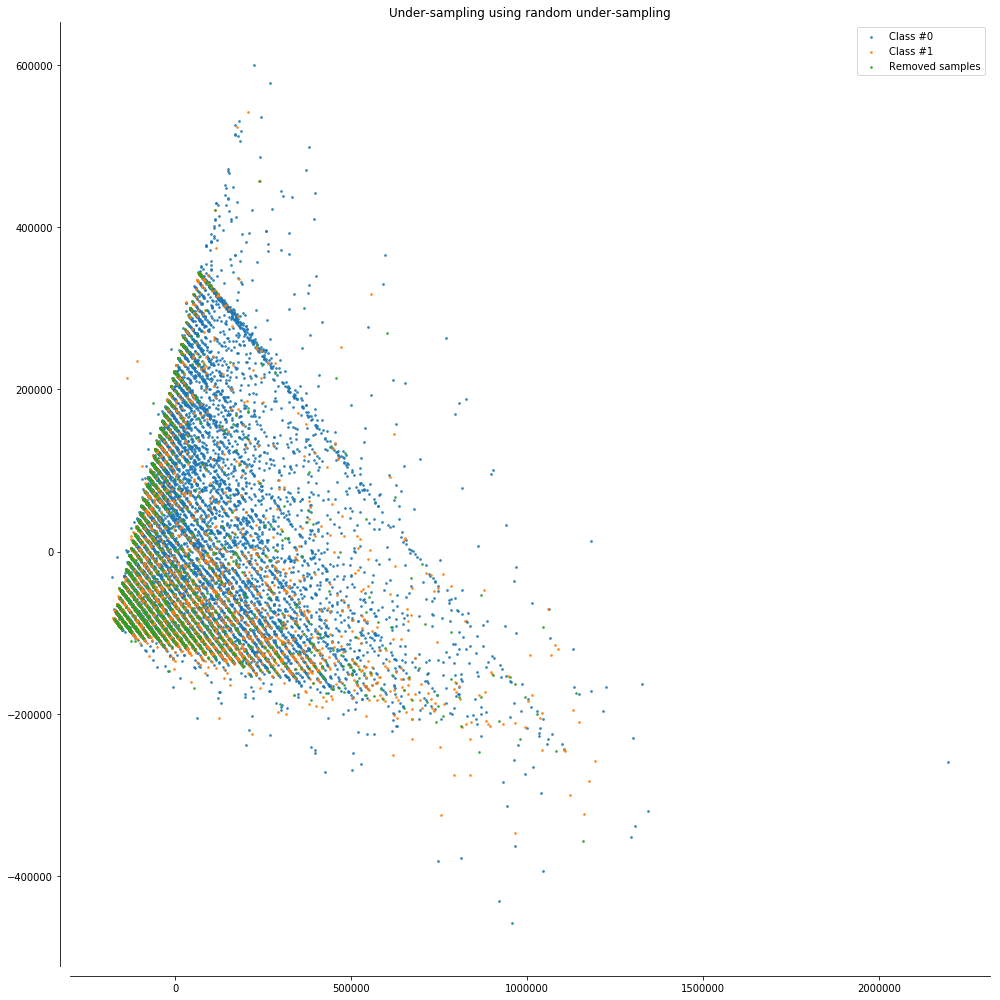

In [87]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(return_indices=True)
X_one_side, y_one_side, idx_one_side = oss.fit_sample(X, y)
X_one_ss = pca.transform(X_one_side)

plot_decision_function(y_one_side, X_vis, X_one_ss, idx_one_side)

Counter({0: 6636, 1: 6636})


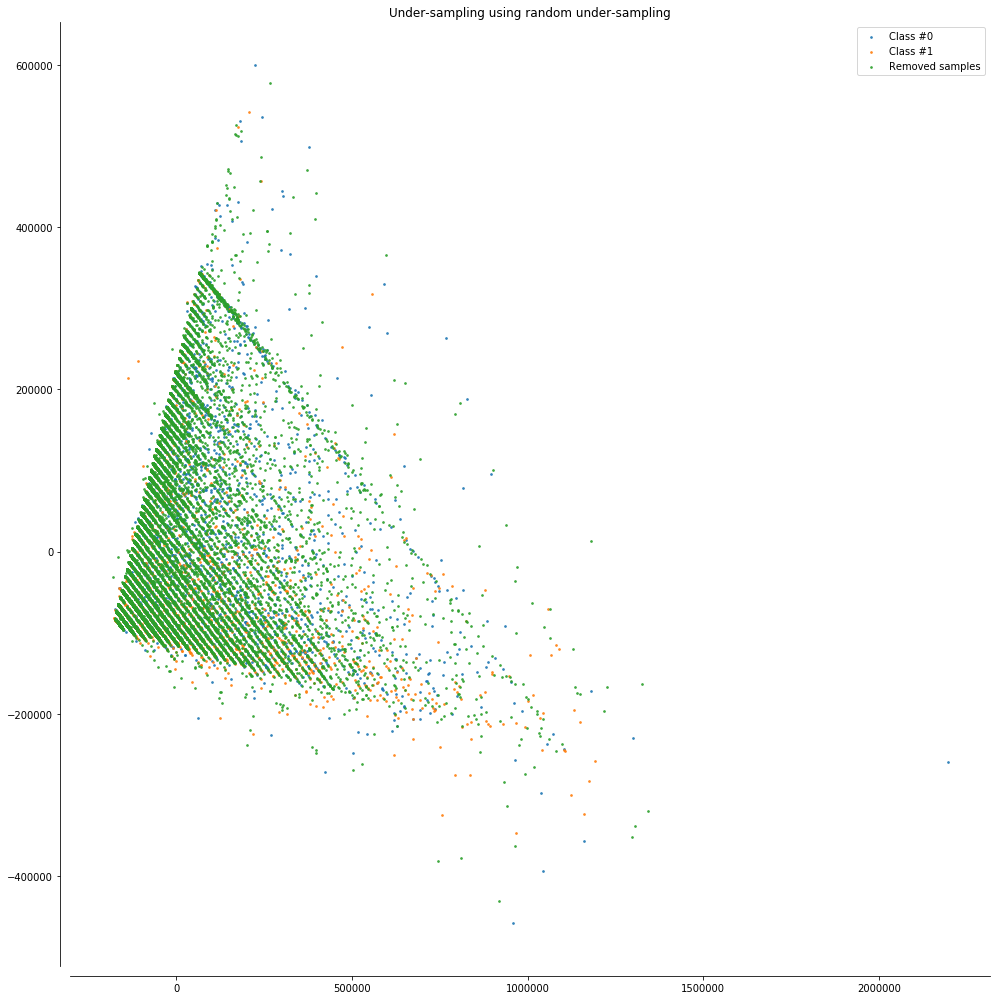

In [88]:
tl = RandomUnderSampler(return_indices=True)
X_random_us, y_random_us, idx_random_us = tl.fit_sample(X, y)
X_random = pca.transform(X_random_us)
plot_decision_function(y_random_us, X_vis, X_random, idx_random_us)


In [89]:
# example of cross-validation

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y)

array([ 0.7787,  0.7788,  0.7786])

In [92]:
cross_val_score(logreg, X_one_side, y_one_side)

array([ 0.76452437,  0.76452437,  0.76449931])

In [91]:
cross_val_score(logreg, X_random_us, y_random_us)

array([ 0.61844485,  0.64421338,  0.63652803])

In [ ]:
# With balancing data the result of cross-validation become worse.

In [ ]:
# I found a topic with the same sense 
# http://www.win-vector.com/blog/2015/02/does-balancing-classes-improve-classifier-performance/
# To improve the results should be a better understanding of which sampling methods for which data sets are applicable 
# and how to select better options 